[[44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338 45.46338
  45.66338 45.86338 46.06338]
 [44.06338 44.26338 44.46338 44.66338 44.86338 45.06338 45.26338

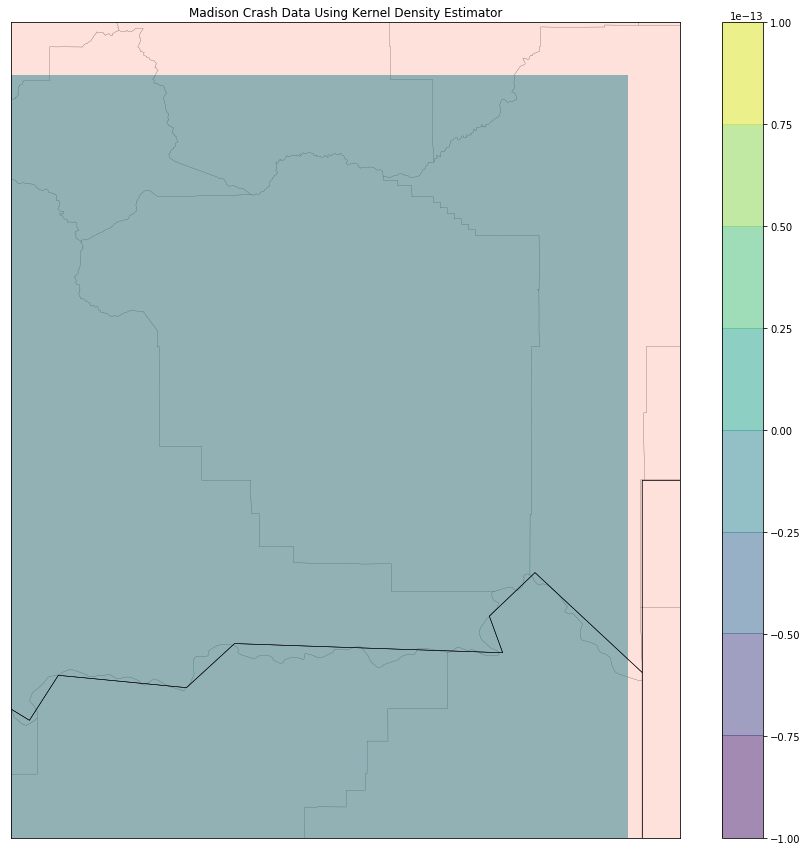

Done


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from pylab import *
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors.kde import KernelDensity
import random
import pandas as pd
import csv

from mpl_toolkits.basemap import Basemap
def draw_map_background(m, ax):
    ax.set_facecolor('#729FCF')
    m.fillcontinents(color='#FFE1DB', ax=ax, zorder=0)
    m.drawcounties(ax=ax,color="000000")
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)
county='Madison'
lats, lons = [], []
with open('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/'+county+'_alldata.csv') as f:
    reader = csv.reader(f)
    next(reader) # Ignore the header row.
    for row in reader:
        lat = float(row[15])
        lon = float(row[16])
        # filter lat,lons to (approximate) map view:
        lats.append(lat)
        lons.append(lon)
d = pd.read_csv('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/'+county+'_alldata.csv')
    #Filter for events with locations. 
geolocated = d.dropna(subset = ['LATITUDE', 'LONGITUDE']) 

# Get matrices/arrays of species IDs and locations

'''
#For Gallatin
min_lat =  44.06338
max_lat = 47.200085
min_lon = -111.891
max_lon = -109.5396
#For Montana
min_lat =  44.36338-1
max_lat = 49.00085+1
min_lon = -116.0491-1
max_lon = -104.0396+1
#Park
min_lat =  44.96338
max_lat = 46.800085
min_lon = -111.291
max_lon = -109.8396
#Madison
min_lat =  44.06338
max_lat = 46.200085
min_lon = -112.891
max_lon = -110.9396
'''
min_lat =  44.06338
max_lat = 46.200085
min_lon = -112.891
max_lon = -110.9396
cmap = 'bwr'
n_neighbors = 20
res = .2

model = KernelDensity(kernel='gaussian', bandwidth = 0.01).fit(geolocated[['LATITUDE', 'LONGITUDE']])
#print(geolocated[['LATITUDE', 'LONGITUDE']])
x = np.arange(min_lat, max_lat, res)
y = np.arange(min_lon, max_lon, res)
X, Y = meshgrid(x, y)
numel = len(X) * len(X[0, :])


color_min = None
color_max = None
unraveled_x = X.reshape([numel, 1])
unraveled_y = Y.reshape([numel, 1])


data_to_eval = np.hstack([unraveled_x, unraveled_y])


temp=model.score_samples(data_to_eval)


density = np.exp(temp)
   
m = Basemap(lon_0=-110.428794,lat_0=46.998846,llcrnrlat = min_lat, urcrnrlat = max_lat, llcrnrlon = min_lon, urcrnrlon=max_lon, resolution='l', fix_aspect = False)
fig = figure()
ax = fig.add_subplot(111)
draw_map_background(m, ax)

density = density.reshape(X.shape)
print(X)
print(Y)

print("*************Density************")
print(density)
gcf().set_size_inches(15,15)

#tricontour(Y, X, density, 15, linewidths=0.5, colors='k')
contourf(Y, X, density,alpha=0.5)
#plt.contour(X, Y, Z, )
#plt.colorbar();

#x,y = m(Y, X)
#m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='Red',markeredgecolor="none", alpha=0.33)
colorbar()
title(county+" Crash Data Using Kernel Density Estimator")
show()
#savefig('/Users/usmp/Google Drive/Saidur_Matt_Term_Project/KDE'+county+'CrashData.jpg')
close()
print("Done")